<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/desafio_RotatividadeRRHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import  StandardScaler

In [ ]:
df=pd.read_excel("/content/Base_dados - Rotatividade RH.xlsx")

In [ ]:
df.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


In [ ]:
df.describe()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento
count,650,144,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,2022-10-31 06:38:46.153846272,2024-05-14 00:00:00,18.690769,28.349231,3.027463,2.940577,6131.587062,10.098864,0.221538
min,2021-06-29 00:00:00,2024-05-14 00:00:00,3.000000,18.000000,1.000242,1.002868,2004.500000,0.003734,0.000000
25%,2022-02-24 00:00:00,2024-05-14 00:00:00,10.000000,22.000000,1.988753,1.968571,4023.752500,4.978000,0.000000
50%,2022-10-22 00:00:00,2024-05-14 00:00:00,19.000000,27.000000,3.058911,2.923458,5562.950000,9.413546,0.000000
75%,2023-07-19 00:00:00,2024-05-14 00:00:00,27.000000,33.000000,4.022709,3.964356,7814.480000,14.749310,0.000000
max,2024-02-14 00:00:00,2024-05-14 00:00:00,35.000000,49.000000,4.992102,4.999415,11957.290000,41.638350,1.000000
std,NaN,NaN,9.652262,8.014983,1.174226,1.148514,2689.075566,6.242406,0.415602


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


In [ ]:
df.isnull().sum()

Data_Contratacao          0
Data_Desligamento       506
Meses_de_Servico          0
Idade                     0
Pontuacao_Desempenho      0
Satisfacao_Trabalho       0
Nivel_Cargo               0
Salario                   0
Horas_Extras              0
Desligamento              0
dtype: int64

In [ ]:
#EVALUAR
#hacer una columna para saber si la persona esta contratada o no
df['Desligado'] = df['Data_Desligamento'].notnull().astype(int)

In [ ]:
#EVALUAR
#eliminar columnas que ya no necesitaremos
df = df.drop(columns=['Data_Contratacao', 'Data_Desligamento'])

In [ ]:
df.head()

,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Desligado
0,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,0
1,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,1
2,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,0
3,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,0
4,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,0


In [ ]:
media_idade = df['Idade'].mean()
media_salario= df['Salario'].mean()
print('a idade media e: {:.0f} anos '.format(media_idade))
print('a media salarial e de: R${:.2f}'.format(media_salario))

a idade media e: 28 anos 
a media salarial e de: R$6131.59


In [ ]:
meses_serviço= df['Meses_de_Servico'].max()
print('o max de meses de serviço registrado e de:',meses_serviço)
meses_serviço= df['Meses_de_Servico'].mean()
print('a media de meses_serviço geral e de: {:.2f}'.format(meses_serviço))

o max de meses de serviço registrado e de: 35
a media de meses_serviço geral e de: 18.69


In [ ]:
df.count()

Meses_de_Servico        650
Idade                   650
Pontuacao_Desempenho    650
Satisfacao_Trabalho     650
Nivel_Cargo             650
Salario                 650
Horas_Extras            650
Desligamento            650
Desligado               650
dtype: int64

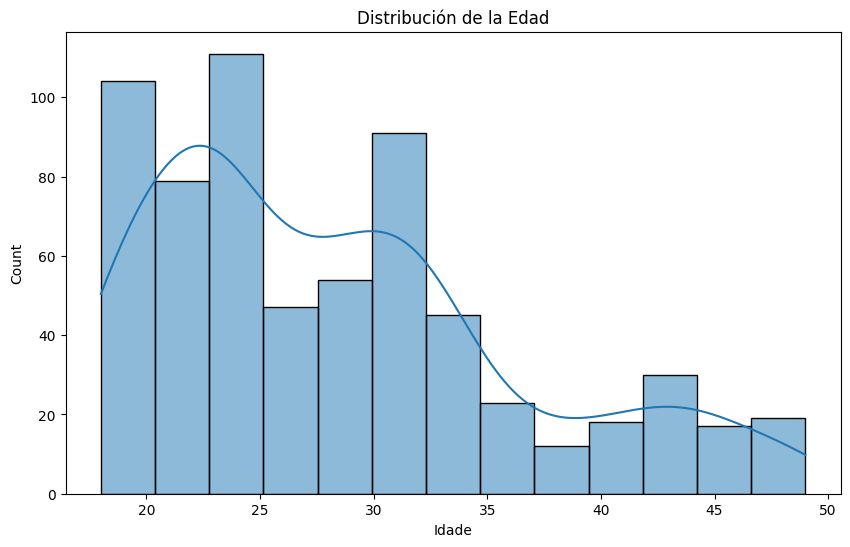

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Idade'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

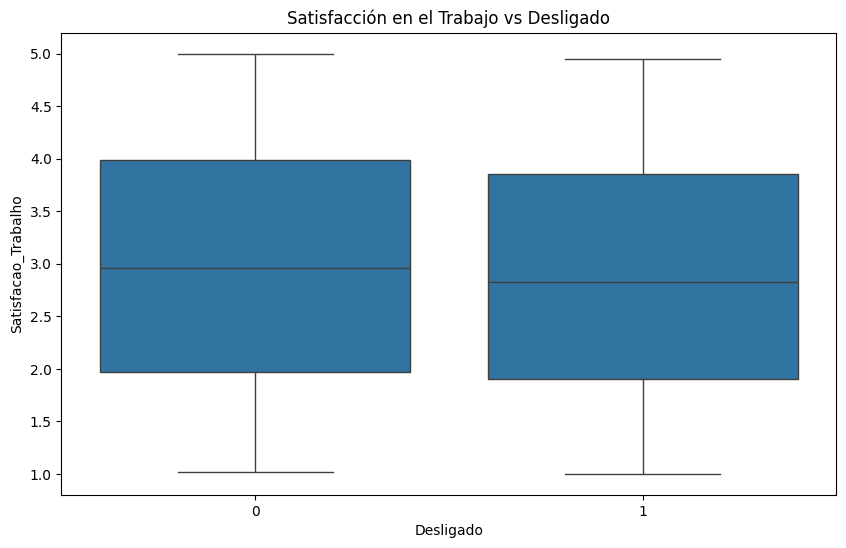

In [ ]:
# Boxplot de Satisfacao_Trabalho por Desligado
plt.figure(figsize=(10, 6))
sns.boxplot(x='Desligado', y='Satisfacao_Trabalho', data=df)
plt.title('Satisfacción en el Trabajo vs Desligado')
plt.show()

In [ ]:
#aqui analizamos a quiantidade de pessoas que foram demitidas e a idade media media das pesoas
columna_idade = df["Idade"]
rango_idade_comun = df.Idade.value_counts().idxmax()
dados_filtrados = df.loc[df["Idade"] == rango_idade_comun]
quantidade_demitidos = len(dados_filtrados)
print(f"Rango de idade más común: {rango_idade_comun}")
print(f"quantidade de demitidos no rango: {quantidade_demitidos}")

Rango de idade más común: 24
quantidade de demitidos no rango: 50


In [ ]:
# Selección de características (features) y la variable objetivo (target)
X = df.drop(columns=['Desligado'])
y = df['Desligado']

# Codificar variables categóricas si es necesario
X = pd.get_dummies(X, drop_first=True)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# trenameto do modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# prevdiçoes
y_pred = model.predict(X_test)

Accuracy: 1.0
Confusion Matrix:
 [[152   0]
 [  0  43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00        43

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



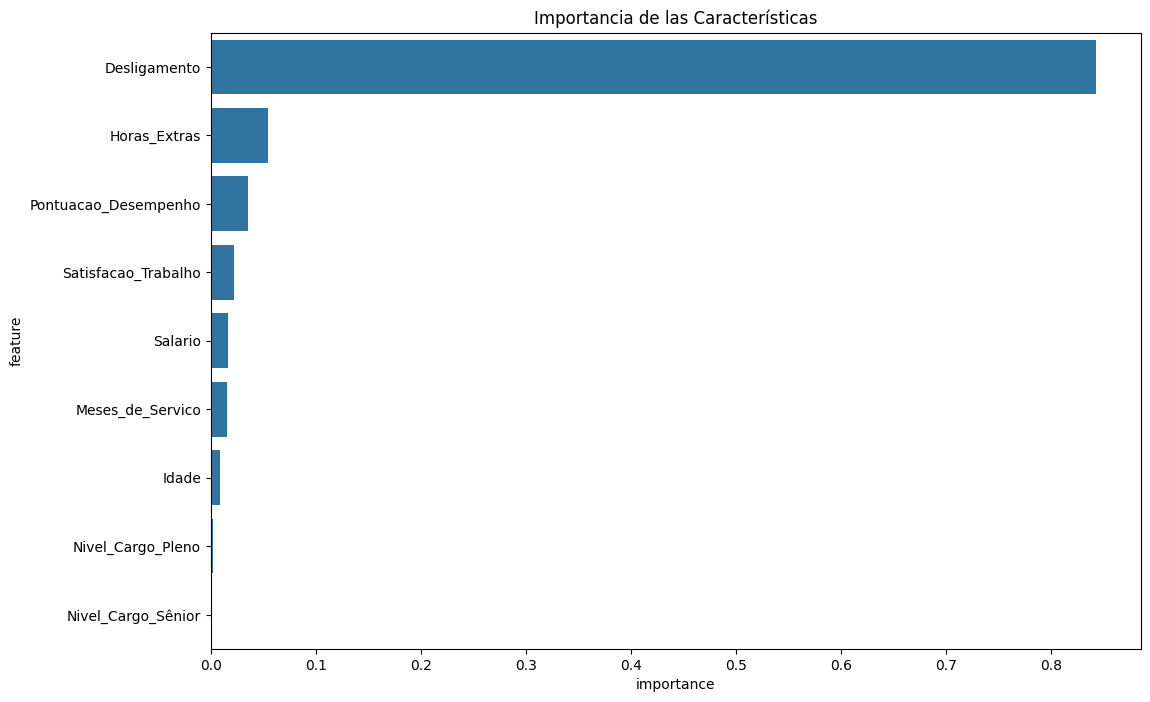

In [ ]:
# Evalua o modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Importancia das características
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

# Visualizar a importancia das características
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.show()

In [ ]:
#agora tiramos a variable que teve maior impacto para ver quais sao as outras que influin na hora de fazer nosas analises e prediçoes
# Selección de características (features) excluyendo 'Desligamento' y la variable objetivo (target)
X = df.drop(columns=['Desligamento'])
y = df['Desligado']

# Codificar variables categóricas si es necesario
X = pd.get_dummies(X, drop_first=True)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


Accuracy: 1.0
Confusion Matrix:
 [[152   0]
 [  0  43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00        43

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



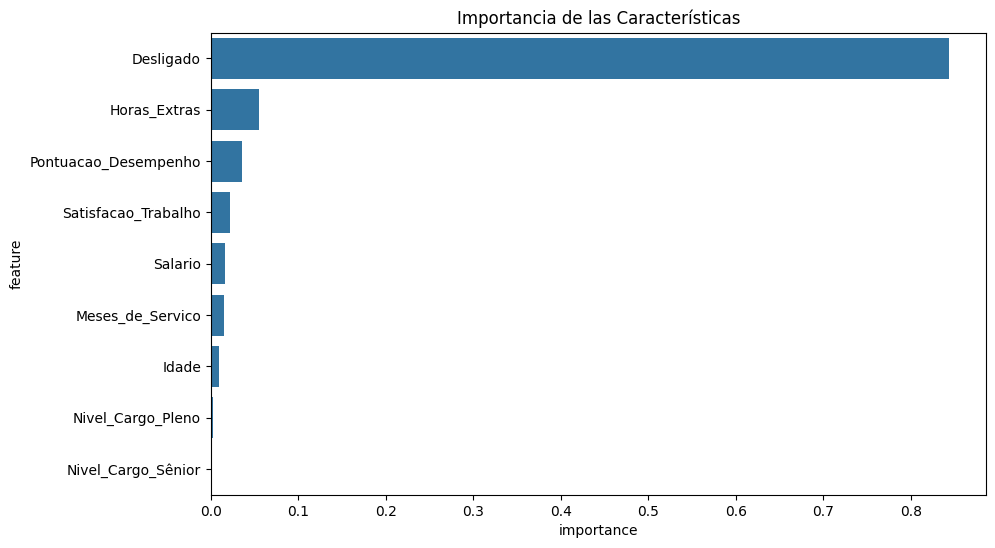

In [ ]:
# Evaluar el modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.show()


##Finalizamos nossa analise

 mas agora podemos continuar nossa analises considerando varios aspectos que estao fona do nosso dataset que nos ajudariam a prediser mais nossa meta de saber diferenciar a pessoa certa de a pessoa errada para trabalhar conosco na empresa